# Predicting car prices using KNN

## Introduction

In this project, we will use the k-nearest neighbors algorithm to predict a car's market price using its atributes.
The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. The information about the dataset can be read [here](https://archive.ics.uci.edu/ml/datasets/automobile) and the dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).
Let's start reading the dataset and exploring it.

In [1]:
import pandas as pd
import numpy as np
cars = pd.read_csv("imports-85.data", header = None,
                   names=["symboling","normalized_losses",
                          "make", "fuel_type","aspiration",
                          "num_doors","body_style",
                          "drive_wheels","engine_location",
                          "wheel_base","length", "width",
                          "height", "curb_weight", 
                          "engine_type", "num_cylinders",
                          "engine_size", "fuel_system",
                          "bore", "stroke", "compression_ratio",
                          "horsepower", "peak_rpm", "city_mpg",
                          "highway_mpg", "price"])
pd.set_option('max_columns', 26)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

## Data cleaning

Usually, we can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we saw that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns and also rescale the values in the numeric columns so they all range from 0 to 1.

In [3]:
cars.replace("?", np.nan, inplace = True)
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
cars["price"].value_counts(dropna = False).sort_index()

10198    1
10245    1
10295    1
10345    1
10595    1
        ..
9980     1
9988     1
9989     1
9995     1
NaN      4
Name: price, Length: 187, dtype: int64

In [5]:
cars = cars.astype({"normalized_losses": "float64",
          "bore": "float64",
          "stroke": "float64",
          "horsepower": "float64",
           "peak_rpm": "float64",
           "price": "float64"
          })

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [7]:
cars_continuos_values = cars[["normalized_losses","wheel_base",
                             "length", "width", "height",
                             "curb_weight",
                             "bore", "stroke", "compression_ratio",
                             "horsepower", "peak_rpm", "city_mpg",
                             "highway_mpg", "price"]].copy()
cars_continuos_values.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
cars_continuos_values.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

We want predict the car prices, so we will drop all the columns with null price:

In [9]:
cars_continuos_values = cars_continuos_values[cars_continuos_values["price"].notnull()]

In [10]:
cars_continuos_values.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Let's replace all the remaining null values with the mean of the column to avoid drop the rows.

In [11]:
cars_continuos_values.fillna(cars_continuos_values.mean(), inplace = True)

In [12]:
cars_continuos_values.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

And now we'll normalize all columns from 0 to 1, except the price column:

In [13]:
price_column = cars_continuos_values["price"]
normalized_cars = (cars_continuos_values - cars_continuos_values.min()) / (cars_continuos_values.max() - cars_continuos_values.min())
normalized_cars["price"] = price_column
normalized_cars.reset_index(inplace = True)
normalized_cars.tail()

,index,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
196,200,0.157068,0.655977,0.71194,0.735043,0.641667,0.567882,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
197,201,0.157068,0.655977,0.71194,0.726496,0.641667,0.605508,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
198,202,0.157068,0.655977,0.71194,0.735043,0.641667,0.591156,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
199,203,0.157068,0.655977,0.71194,0.735043,0.641667,0.670675,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0
200,204,0.157068,0.655977,0.71194,0.735043,0.641667,0.610551,0.885714,0.514286,0.15625,0.308411,0.510204,0.166667,0.236842,22625.0


## Univariate model

We'll create a function, named knn_train_test() that encapsulates the training and simple validation process. This function will have 3 parameters -- training column name, target column name, and the dataframe object.
* This function will split the data set into a training and test set.
* Then, it will instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
* Finally, it will calculate the RMSE and return that value.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_column,target_column,df):
    np.random.seed(1)
    df = df.iloc[np.random.permutation(df.index)]
    training_lon = round((df.shape[0])*0.5)
    train_df = df[:training_lon]
    test_df = df[training_lon:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_column]],train_df[target_column])
    predictions = knn.predict(test_df[[training_column]])
    rmse = np.sqrt(mean_squared_error(test_df[target_column],
                                      predictions))
    return rmse

Now we will use this function to train and test univariate models using the different numeric columns in the data set:

In [15]:
columns = list(normalized_cars.columns)
columns.remove("price")
rmses = {}

for c in columns:
    rmse = knn_train_test(c,"price",normalized_cars)
    rmses[c] = rmse

rmse_values = pd.Series(rmses)
rmse_values.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
index                6325.904913
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

As we can see the column "horse power" performed the best using the default k value (5). Now we'll modify the knn_train_test() function to accept a parameter for the k value. And we'll use the new function with the columns of the dataset.

In [16]:
def knn_train_test_k(training_column,target_column,df,k_values):
    np.random.seed(1)
    df = df.iloc[np.random.permutation(df.index)]
    training_lon = round((df.shape[0])*0.5)
    train_df = df[:training_lon]
    test_df = df[training_lon:]
    rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[training_column]],train_df[target_column])
        predictions = knn.predict(test_df[[training_column]])
        rmse = np.sqrt(mean_squared_error(test_df[target_column],
                                          predictions))
        rmses[k] = rmse
    return rmses

In [17]:
knn_train_test_k("horsepower","price",normalized_cars,[1,3,5,7,9])

{1: 4170.054848037801,
 3: 4020.8492630885394,
 5: 4037.0377131537603,
 7: 4353.811860277134,
 9: 4515.135617419103}

In [18]:
k_val = [1,3,5,7,9]
rmses_k = {}

for c in columns:
    rmse = knn_train_test_k(c,"price",normalized_cars,k_val)
    rmses_k[c] = rmse

rmses_k = pd.DataFrame(rmses_k)
rmses_k

,index,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
1,6586.668898,7846.750605,4493.734069,4628.455501,4559.257298,8904.046456,5264.290231,8602.588485,9116.495955,8087.205347,4170.054848,9511.480068,5901.143574,6025.594967
3,5119.358478,7500.569812,5120.161506,5129.835821,4606.413692,8277.609643,5022.318012,6984.239489,7338.684670,7375.063686,4020.849263,8537.550900,4646.746409,4617.305020
5,6325.904913,7330.197653,5461.553998,5427.200961,4704.482590,8144.441043,4401.118255,6780.627785,8006.529545,6610.812153,4037.037713,7697.459696,4766.422505,4630.026799
7,7141.857806,7756.421586,5448.107051,5313.427721,4571.485046,7679.598124,4330.608104,6878.097966,7803.937797,6732.801283,4353.811860,7510.294160,5232.523034,4796.061440
9,7193.244367,7688.096097,5738.405685,5383.054515,4652.914172,7811.036063,4632.044474,6866.808502,7735.554366,7024.485525,4515.135617,7340.041341,5465.209493,5278.358057


Let's plot the RMSE vs the k for each feature.

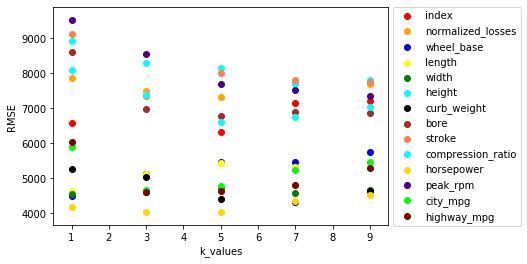

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
colors = ["red", "orange", "blue", "yellow", "green", "aqua",
         "black", "brown", "coral", "cyan", "gold", "indigo",
          "lime", "maroon"]
         
for c in columns:
    plt.scatter(x = rmses_k.index, y = rmses_k[c], c = colors[i])
    i += 1

plt.legend(columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("k_values")
plt.ylabel("RMSE")
plt.show()

## Multivariate model

Let's compute average RMSE across different `k` values for each feature

In [20]:
mean_rmse = rmses_k.mean().sort_values()
mean_rmse

horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
index                6473.406893
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

Let's modify the knn_train_test_k() function we wrote to work with multiple columns and with a default k value of 5.

In [21]:
def knn_train_test_k2(training_columns,target_column,df,k_values = [5]):
    np.random.seed(1)
    df = df.iloc[np.random.permutation(df.index)]
    training_lon = round((df.shape[0])*0.5)
    train_df = df[:training_lon]
    test_df = df[training_lon:]
    rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[training_columns],train_df[target_column])
        predictions = knn.predict(test_df[training_columns])
        rmse = np.sqrt(mean_squared_error(test_df[target_column],
                                          predictions))
        rmses[k] = rmse
    return rmses

We will use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value. We will continue with the best 3 and so on.

In [22]:
two_best = list(mean_rmse.index[:2])
knn_train_test_k2(two_best,"price",normalized_cars)

{5: 3589.3132622073304}

In [23]:
rsme_result = {}
for n in range(2,7):
    n_best = list(mean_rmse.index[:n])
    result = knn_train_test_k2(n_best,"price",normalized_cars)
    rsme_result[n] = result[5]
    print("{} best results: {}".format(n,result[5]))

rsme_result = pd.Series(rsme_result).sort_values()

2 best results: 3589.3132622073304
3 best results: 3305.9401397969677
4 best results: 3358.6915801682458
5 best results: 3665.546673045813
6 best results: 3628.261188214127


## Hyperparameter tuning

Let's now optimize the model that performed the best in the previous step: For the top 3 models in the last step, we will vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [24]:
rsme_result_k = {}
new_k = np.arange(1,26)
for n in range(2,5):
    n_best = list(mean_rmse.index[:n])
    result = knn_train_test_k2(n_best,"price",normalized_cars, new_k)
    rsme_result_k["{} features".format(n)] = result

rsme_result_k = pd.DataFrame(rsme_result_k)
rsme_result_k

,2 features,3 features,4 features
1,4061.961305,3013.010999,2600.746384
2,3497.499362,2813.285970,2725.432507
3,3402.869264,3171.585284,3108.858031
4,3587.004420,3182.313742,3217.313521
5,3589.313262,3305.940140,3358.691580
6,3680.062981,3522.506849,3633.168703
7,3756.927964,3774.377209,3896.127441
8,3937.770418,3978.969124,4002.838390
9,4078.348592,3992.923681,4055.530937
10,4163.828374,4076.238147,4128.678077


In [25]:
min_2features = list(rsme_result_k[rsme_result_k["2 features"] == rsme_result_k["2 features"].min()]["2 features"].index)[0]
print("The optimal k for the best \"2 features\" is {}, with an rmse of {:.2f}".format(min_2features,rsme_result_k["2 features"].min()))
min_3features = list(rsme_result_k[rsme_result_k["3 features"] == rsme_result_k["3 features"].min()]["3 features"].index)[0]
print("The optimal k for the best \"3 features\" is {}, with an rmse of {:.2f}".format(min_3features,rsme_result_k["3 features"].min()))
min_4features = list(rsme_result_k[rsme_result_k["4 features"] == rsme_result_k["4 features"].min()]["4 features"].index)[0]
print("The optimal k for the best \"4 features\" is {}, with an rmse of {:.2f}".format(min_4features,rsme_result_k["4 features"].min()))

The optimal k for the best "2 features" is 3, with an rmse of 3402.87
The optimal k for the best "3 features" is 2, with an rmse of 2813.29
The optimal k for the best "4 features" is 1, with an rmse of 2600.75


Finally we'll plot the RMSE vs k_values for 2, 3 and 4 features.

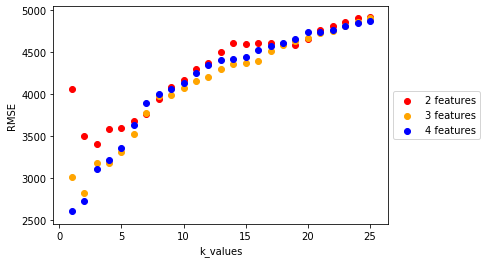

In [26]:
i = 0
colors = ["red", "orange", "blue", "yellow", "green", "aqua",
         "black", "brown", "coral", "cyan", "gold", "indigo",
          "lime", "maroon"]
         
for c in rsme_result_k.columns:
    plt.scatter(x = rsme_result_k.index, y = rsme_result_k[c], c = colors[i])
    i += 1

plt.legend(["2 features", "3 features", "4 features"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("k_values")
plt.ylabel("RMSE")
plt.show()